In [2]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install wordcloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
import string
import re
from textblob import TextBlob
from wordcloud import WordCloud
!pip install contractions

import contractions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [88]:
df = pd.read_excel('C:/Users/Utkarsh/Documents/Reviewify/New folder/AmityUni.xlsx')

In [90]:
df.head()

,review,Sentiment
0,Transport services are convenient and punctual.,Good
1,Placements for CS and IT branches are impressive.,Good
2,Limited industry exposure in niche fields.,Bad
3,Strict attendance policy is a burden.,Bad
4,No flexibility in course selection.,Bad


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     100 non-null    object
 1   Sentiment  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [94]:
df['review']

0       Transport services are convenient and punctual.
1     Placements for CS and IT branches are impressive.
2            Limited industry exposure in niche fields.
3                 Strict attendance policy is a burden.
4                   No flexibility in course selection.
                            ...                        
95       Decent hostel facilities with proper security.
96        Not enough mock interviews before placements.
97    Clubs and societies are very active and engaging.
98     Exam schedule changes frequently without notice.
99    Scholarship opportunities are available for me...
Name: review, Length: 100, dtype: object

In [96]:
df.isnull().sum()

review       0
Sentiment    0
dtype: int64

In [98]:
df= df.dropna()
df.isnull().sum()

review       0
Sentiment    0
dtype: int64

In [100]:
df.duplicated().sum()

0

In [102]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     100 non-null    object
 1   Sentiment  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [108]:
df['Sentiment'].value_counts()

Sentiment
Good    50
Bad     50
Name: count, dtype: int64

In [ ]:
#NLP

In [114]:
#lowercase
df['review']= df['review'].str.lower()
df['review'].head()

0      transport services are convenient and punctual.
1    placements for cs and it branches are impressive.
2           limited industry exposure in niche fields.
3                strict attendance policy is a burden.
4                  no flexibility in course selection.
Name: review, dtype: object

In [115]:
#expanding abrrivieations
def remove_abb(data):
     data = re.sub(r"he's", "he is", data)
     data = re.sub(r"there's", "there is", data)
     data = re.sub(r"We're", "We are", data)
     data = re.sub(r"That's", "That is", data)
     data = re.sub(r"won't", "will not", data)
     data = re.sub(r"they're", "they are", data)
     data = re.sub(r"Can't", "Cannot", data)
     data = re.sub(r"wasn't", "was not", data)
     data = re.sub(r"don\x89Ûªt", "do not", data)
     data= re.sub(r"aren't", "are not", data)
     data = re.sub(r"isn't", "is not", data)
     data = re.sub(r"What's", "What is", data)
     data = re.sub(r"haven't", "have not", data)
     data = re.sub(r"hasn't", "has not", data)
     data = re.sub(r"There's", "There is", data)
     data = re.sub(r"He's", "He is", data)
     data = re.sub(r"It's", "It is", data)
     data = re.sub(r"You're", "You are", data)
     data = re.sub(r"I'M", "I am", data)
     data = re.sub(r"shouldn't", "should not", data)
     data = re.sub(r"wouldn't", "would not", data)
     data = re.sub(r"i'm", "I am", data)
     data = re.sub(r"I\x89Ûªm", "I am", data)
     data = re.sub(r"I'm", "I am", data)
     data = re.sub(r"Isn't", "is not", data)
     data = re.sub(r"Here's", "Here is", data)
     data = re.sub(r"you've", "you have", data)
     data = re.sub(r"you\x89Ûªve", "you have", data)
     data = re.sub(r"we're", "we are", data)
     data = re.sub(r"what's", "what is", data)
     data = re.sub(r"couldn't", "could not", data)
     data = re.sub(r"we've", "we have", data)
     data = re.sub(r"it\x89Ûªs", "it is", data)
     data = re.sub(r"doesn\x89Ûªt", "does not", data)
     data = re.sub(r"It\x89Ûªs", "It is", data)
     data = re.sub(r"Here\x89Ûªs", "Here is", data)
     data = re.sub(r"who's", "who is", data)
     data = re.sub(r"I\x89Ûªve", "I have", data)
     data = re.sub(r"y'all", "you all", data)
     data = re.sub(r"can\x89Ûªt", "cannot", data)
     data = re.sub(r"would've", "would have", data)
     data = re.sub(r"it'll", "it will", data)
     data = re.sub(r"we'll", "we will", data)
     data = re.sub(r"wouldn\x89Ûªt", "would not", data)
     data = re.sub(r"We've", "We have", data)
     data = re.sub(r"he'll", "he will", data)
     data = re.sub(r"Y'all", "You all", data)
     data = re.sub(r"Weren't", "Were not", data)
     data = re.sub(r"Didn't", "Did not", data)
     data = re.sub(r"they'll", "they will", data)
     data = re.sub(r"they'd", "they would", data)
     data = re.sub(r"DON'T", "DO NOT", data)
     data = re.sub(r"That\x89Ûªs", "That is", data)
     data = re.sub(r"they've", "they have", data)
     data = re.sub(r"i'd", "I would", data)
     data = re.sub(r"should've", "should have", data)
     data = re.sub(r"You\x89Ûªre", "You are", data)
     data = re.sub(r"where's", "where is", data)
     data = re.sub(r"Don\x89Ûªt", "Do not", data)
     data = re.sub(r"we'd", "we would", data)
     data = re.sub(r"i'll", "I will", data)
     data = re.sub(r"weren't", "were not", data)
     data = re.sub(r"They're", "They are", data)
     data = re.sub(r"Can\x89Ûªt", "Cannot", data)
     data = re.sub(r"you\x89Ûªll", "you will", data)
     data = re.sub(r"I\x89Ûªd", "I would", data)
     data = re.sub(r"let's", "let us", data)
     data = re.sub(r"it's", "it is", data)
     data = re.sub(r"can't", "cannot", data)
     data = re.sub(r"don't", "do not", data)
     data = re.sub(r"you're", "you are", data)
     data = re.sub(r"i've", "I have", data)
     data = re.sub(r"that's", "that is", data)
     data = re.sub(r"i'll", "I will", data)
     data = re.sub(r"doesn't", "does not",data)
     data = re.sub(r"i'd", "I would", data)
     data = re.sub(r"didn't", "did not", data)
     data = re.sub(r"ain't", "am not", data)
     data = re.sub(r"you'll", "you will", data)
     data = re.sub(r"I've", "I have", data)
     data = re.sub(r"Don't", "do not", data)
     data = re.sub(r"I'll", "I will", data)
     data = re.sub(r"I'd", "I would", data)
     data = re.sub(r"Let's", "Let us", data)
     data = re.sub(r"you'd", "You would", data)
     data = re.sub(r"It's", "It is", data)
     data = re.sub(r"Ain't", "am not", data)
     data = re.sub(r"Haven't", "Have not", data)
     data = re.sub(r"Could've", "Could have", data)
     data = re.sub(r"youve", "you have", data)
     data = re.sub(r"donå«t", "do not", data)
     return data

df['review']= df['review'].apply(remove_abb)
df['review']


0       transport services are convenient and punctual.
1     placements for cs and it branches are impressive.
2            limited industry exposure in niche fields.
3                 strict attendance policy is a burden.
4                   no flexibility in course selection.
                            ...                        
95       decent hostel facilities with proper security.
96        not enough mock interviews before placements.
97    clubs and societies are very active and engaging.
98     exam schedule changes frequently without notice.
99    scholarship opportunities are available for me...
Name: review, Length: 100, dtype: object

In [116]:
#spelling mistakes correct

def spell_correct(text):
    return TextBlob(str(text)).correct().string

df['review'].apply(spell_correct)
df['review'].head()

0      transport services are convenient and punctual.
1    placements for cs and it branches are impressive.
2           limited industry exposure in niche fields.
3                strict attendance policy is a burden.
4                  no flexibility in course selection.
Name: review, dtype: object

In [117]:
#removing punctuation

def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
    return text 

df['review'] = df['review'].apply(remove_punctuation)

df['review'].head()

0      transport services are convenient and punctual
1    placements for cs and it branches are impressive
2           limited industry exposure in niche fields
3                strict attendance policy is a burden
4                  no flexibility in course selection
Name: review, dtype: object

In [118]:
#tokenization
df['tokenized_review'] = df['review'].apply(word_tokenize)
df['tokenized_review'].head()

0    [transport, services, are, convenient, and, pu...
1    [placements, for, cs, and, it, branches, are, ...
2     [limited, industry, exposure, in, niche, fields]
3          [strict, attendance, policy, is, a, burden]
4             [no, flexibility, in, course, selection]
Name: tokenized_review, dtype: object

In [119]:
#stop words removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text if word.lower() not in stop_words]
    return filtered_words

df['tokenized_review']=df['tokenized_review'].apply(remove_stopwords)

df['tokenized_review'].head()

0     [transport, services, convenient, punctual]
1          [placements, cs, branches, impressive]
2    [limited, industry, exposure, niche, fields]
3            [strict, attendance, policy, burden]
4                [flexibility, course, selection]
Name: tokenized_review, dtype: object

In [120]:
#stemming

stemmer = PorterStemmer()
df['review'] = df['tokenized_review'].apply(lambda words: [stemmer.stem(word) for word in words])
df['review'].head()

0     [transport, servic, conveni, punctual]
1           [placement, cs, branch, impress]
2    [limit, industri, exposur, nich, field]
3           [strict, attend, polici, burden]
4                   [flexibl, cours, select]
Name: review, dtype: object

In [121]:
#lemmatization

lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda words: [lemmatizer.lemmatize(word, pos='v') for word in words])
df['review'].head()

0     [transport, servic, conveni, punctual]
1           [placement, cs, branch, impress]
2    [limit, industri, exposur, nich, field]
3           [strict, attend, polici, burden]
4                   [flexibl, cours, select]
Name: review, dtype: object

In [122]:
#remove extra white spaces
#df['review'] = df['review'].apply(lambda x: ' '.join(x[0].split()) if isinstance(x, list) and len(x) > 0 else x)

df['review'].head()

0     [transport, servic, conveni, punctual]
1           [placement, cs, branch, impress]
2    [limit, industri, exposur, nich, field]
3           [strict, attend, polici, burden]
4                   [flexibl, cours, select]
Name: review, dtype: object

In [123]:
#handling abbrivieations


df['review'] = df['review'].apply(lambda x: contractions.fix(x) if isinstance(x, str) else x)
df['review'].head()

0     [transport, servic, conveni, punctual]
1           [placement, cs, branch, impress]
2    [limit, industri, exposur, nich, field]
3           [strict, attend, polici, burden]
4                   [flexibl, cours, select]
Name: review, dtype: object

In [124]:
#review<--tokenized review
df['review'] = df['tokenized_review'].apply(lambda x:" ".join(x))
df['review'].head()

0    transport services convenient punctual
1         placements cs branches impressive
2    limited industry exposure niche fields
3           strict attendance policy burden
4              flexibility course selection
Name: review, dtype: object

In [125]:
df['char_length'] = df['review'].str.len()
df.head()

,review,Sentiment,tokenized_review,char_length
0,transport services convenient punctual,Good,"[transport, services, convenient, punctual]",38
1,placements cs branches impressive,Good,"[placements, cs, branches, impressive]",33
2,limited industry exposure niche fields,Bad,"[limited, industry, exposure, niche, fields]",38
3,strict attendance policy burden,Bad,"[strict, attendance, policy, burden]",31
4,flexibility course selection,Bad,"[flexibility, course, selection]",28


In [126]:
#Data Analysis

In [127]:
df['tokenized_review'].sum()

['transport',
 'services',
 'convenient',
 'punctual',
 'placements',
 'cs',
 'branches',
 'impressive',
 'limited',
 'industry',
 'exposure',
 'niche',
 'fields',
 'strict',
 'attendance',
 'policy',
 'burden',
 'flexibility',
 'course',
 'selection',
 'helpful',
 'responsive',
 'administrative',
 'staff',
 'labs',
 'wellequipped',
 'functional',
 'oncampus',
 'atms',
 'stationery',
 'shops',
 'online',
 'learning',
 'systems',
 'smooth',
 'userfriendly',
 'clean',
 'spacious',
 'hostels',
 'laundry',
 'facilities',
 'daily',
 'attendance',
 'tracking',
 'keeps',
 'students',
 'disciplined',
 'administrative',
 'processes',
 'slow',
 'good',
 'industry',
 'connections',
 'internships',
 'environment',
 'clean',
 'green',
 'proactive',
 'training',
 'placement',
 'cell',
 'relaxation',
 'attendance',
 'genuine',
 'issues',
 'faculty',
 '’',
 'provide',
 'enough',
 'feedback',
 'faculty',
 'departments',
 'inexperienced',
 'teachers',
 'encourage',
 'participation',
 'competitions',
 'l

In [128]:
pd.Series(ngrams(df['review'].sum(),2)).value_counts()

(s,  )    74
(e, s)    65
(e, n)    64
(i, n)    57
(e,  )    56
          ..
(w, a)     1
(a, w)     1
(h, d)     1
(y, c)     1
(w, s)     1
Name: count, Length: 342, dtype: int64

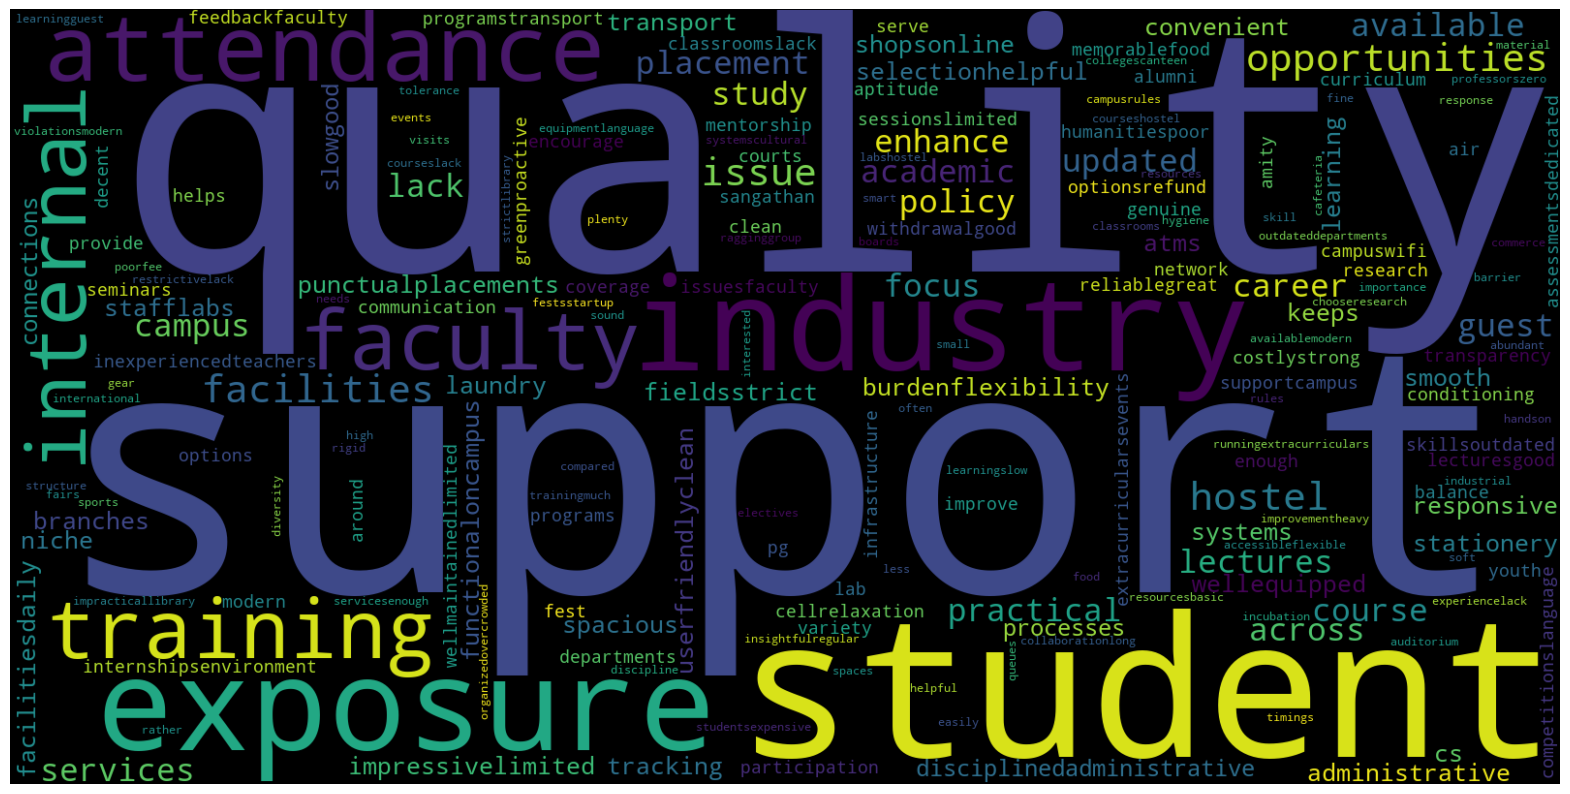

In [129]:
plt.figure(figsize=(20,20))
wc = WordCloud(width=1600, height=800).generate("".join(df['review']))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()